In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np

In [16]:
taskfile = pd.read_csv('/Volumes/Watts/TimeTracker/TaskInfo/tasks.csv')

In [17]:
taskfile.head()

,Name,Date,TaskDescription,TaskCategory,TimeTaken
0,Andrew Ballesteros,04/17/2023,Instagram Planning and Scheduling,Social Media,0:24:03
1,Travis,04/17/2023,Talking,Admin,0:00:06
2,Travis,04/17/2023,Talking,Admin,0:16:31
3,Tate,04/17/2023,Ben - Designing Trees,Editing,0:56:14
4,Travis,04/17/2023,Student Help,Admin,0:16:06


In [18]:
total_times = {}
time_sum = dt.timedelta(0)
for category in taskfile['TaskCategory'].unique():
    time_sum = dt.timedelta(0)
    print (time_sum)

    for time in taskfile.loc[taskfile['TaskCategory'] == category, 'TimeTaken']:
        conv_time = dt.datetime.strptime(time, '%H:%M:%S')
        conv_time = dt.timedelta(hours=conv_time.hour, minutes=conv_time.minute, seconds=conv_time.second)
        time_sum += conv_time
    total_times[category] = [time_sum.seconds]


print(total_times)

0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
{'Social Media': [9205], 'Admin': [19697], 'Editing': [54048], 'Writing': [26606], 'Meetings': [9174], 'Research': [7427], 'Programming': [6094], 'Filming': [48519]}


In [19]:
total_times = pd.DataFrame.from_dict(total_times, orient='columns')
total_times = total_times.T

In [20]:
total_times.head()

,0
Social Media,9205
Admin,19697
Editing,54048
Writing,26606
Meetings,9174


In [21]:
total_times = total_times.sort_values(by=0, axis=0, ascending=False)
total_times = total_times.T

In [26]:
total_times.head()
total_times.values.tolist()

[[54048, 48519, 26606, 19697, 9205, 9174, 7427, 6094]]

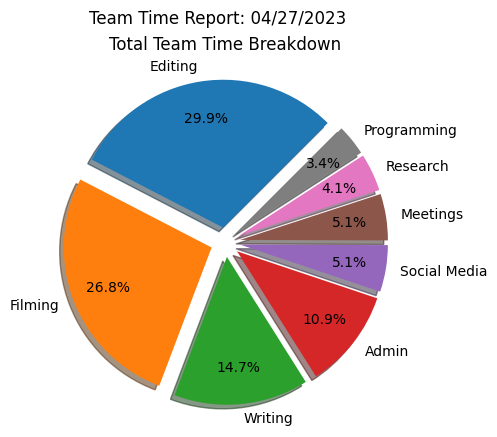

In [55]:
explode_values = []
for i in total_times.values.tolist()[0]:
    explode_values.append(.1)

plt.pie(total_times.values.tolist()[0], startangle=45, labels=total_times.columns, autopct='%1.1f%%', pctdistance=.75, shadow=True, explode=explode_values)
plt.suptitle(f"Team Time Report: {dt.datetime.now().strftime('%m/%d/%Y')}")
plt.title('Total Team Time Breakdown')
plt.show()